In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('/content/NEO Earth Close Approaches.csv')
df.head(),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Object                    1573 non-null   object 
 1   Close-Approach (CA) Date  1573 non-null   object 
 2   CA DistanceNominal (au)   1573 non-null   float64
 3   CA DistanceMinimum (au)   1573 non-null   float64
 4   V relative(km/s)          1573 non-null   float64
 5   V infinity(km/s)          1573 non-null   float64
 6   H(mag)                    1573 non-null   float64
 7   Diameter                  1573 non-null   object 
 8   Rarity                    1573 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 110.7+ KB


(       Object     Close-Approach (CA) Date  CA DistanceNominal (au)  \
 0  (2023 JA1)  2023-May-03 01:15 ± < 00:01                  0.02518   
 1  (2023 HV5)  2023-May-03 03:16 ± < 00:01                  0.00291   
 2  (2023 JM2)  2023-May-03 05:23 ± < 00:01                  0.04008   
 3  (2023 HF7)  2023-May-04 00:02 ± < 00:01                  0.00427   
 4  (2023 HH7)  2023-May-04 05:47 ± < 00:01                  0.00561   
 
    CA DistanceMinimum (au)  V relative(km/s)  V infinity(km/s)  H(mag)  \
 0                  0.02509              5.01              4.99    26.6   
 1                  0.00290              8.93              8.82    27.2   
 2                  0.03996              6.33              6.32    26.0   
 3                  0.00426             13.10             13.05    26.8   
 4                  0.00558             24.55             24.53    25.5   
 
          Diameter  Rarity  
 0   13 m -   29 m       0  
 1  9.8 m -   22 m       0  
 2   17 m -   38 m       0 

The dataset contains 1,573 entries and 9 columns.
No missing values.
The Close-Approach (CA) Date column is in string format and needs conversion to datetime.
The Diameter column contains ranges (e.g., "13 m - 29 m"), requiring parsing into min/max values.

In [84]:
df.describe()


,Close-Approach (CA) Date,CA DistanceNominal (au),CA DistanceMinimum (au),V relative(km/s),V infinity(km/s),H(mag),Rarity,Diameter Min (m),Diameter Max (m)
count,1573,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,2023-11-03 04:32:41.042593792,0.021108,0.020705,10.596853,10.540846,26.136554,0.127146,23.903566,50.047997
min,2023-05-03 01:15:00,0.000070,0.000070,0.440000,0.130000,18.500000,0.000000,0.910000,2.000000
25%,2023-09-07 00:19:00,0.008530,0.008310,7.040000,7.000000,25.200000,0.000000,9.600000,21.000000
50%,2023-10-27 11:16:00,0.019840,0.019190,9.600000,9.570000,26.200000,0.000000,15.000000,34.000000
75%,2024-01-14 00:04:00,0.032290,0.031630,13.360000,13.320000,27.200000,0.000000,25.000000,55.000000
max,2024-05-01 21:51:00,0.049960,0.049700,36.370000,36.370000,32.300000,3.000000,540.000000,860.000000
std,NaN,0.014094,0.013952,5.098807,5.115487,1.790651,0.381315,40.118101,68.066711


In [77]:
df['Close-Approach (CA) Date'] = pd.to_datetime(
    df['Close-Approach (CA) Date'].str.split('±').str[0].str.strip(),
    format='%Y-%b-%d %H:%M',
    errors='coerce'
)

df["Diameter Min (m)"] = df["Diameter"].str.extract(r'(\d+\.?\d*) m')[0].astype(float)
df["Diameter Max (m)"] = df["Diameter"].str.extract(r'-\s*(\d+\.?\d*) m')[0].astype(float)

df.drop(columns=["Diameter"], inplace=True)

df.head()

,Object,Close-Approach (CA) Date,CA DistanceNominal (au),CA DistanceMinimum (au),V relative(km/s),V infinity(km/s),H(mag),Rarity,Diameter Min (m),Diameter Max (m)
0,(2023 JA1),2023-05-03 01:15:00,0.02518,0.02509,5.01,4.99,26.6,0,13.0,29.0
1,(2023 HV5),2023-05-03 03:16:00,0.00291,0.00290,8.93,8.82,27.2,0,9.8,22.0
2,(2023 JM2),2023-05-03 05:23:00,0.04008,0.03996,6.33,6.32,26.0,0,17.0,38.0
3,(2023 HF7),2023-05-04 00:02:00,0.00427,0.00426,13.10,13.05,26.8,0,12.0,26.0
4,(2023 HH7),2023-05-04 05:47:00,0.00561,0.00558,24.55,24.53,25.5,1,21.0,47.0


In [89]:
df.isnull().sum()


,0
Object,0
Close-Approach (CA) Date,0
CA DistanceNominal (au),0
CA DistanceMinimum (au),0
V relative(km/s),0
V infinity(km/s),0
H(mag),0
Rarity,0
Diameter Min (m),0
Diameter Max (m),0


In [106]:
df.dtypes

,0
Object,object
Close-Approach (CA) Date,datetime64[ns]
CA DistanceNominal (au),float64
CA DistanceMinimum (au),float64
V relative(km/s),float64
V infinity(km/s),float64
H(mag),float64
Rarity,int64
Diameter Min (m),float64
Diameter Max (m),float64


In [90]:
df["Diameter Min (m)"].fillna(df["Diameter Min (m)"].median(), inplace=True)
df["Diameter Max (m)"].fillna(df["Diameter Max (m)"].median(), inplace=True)


<ipython-input-90-f8bf60fee59b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Diameter Min (m)"].fillna(df["Diameter Min (m)"].median(), inplace=True)
<ipython-input-90-f8bf60fee59b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

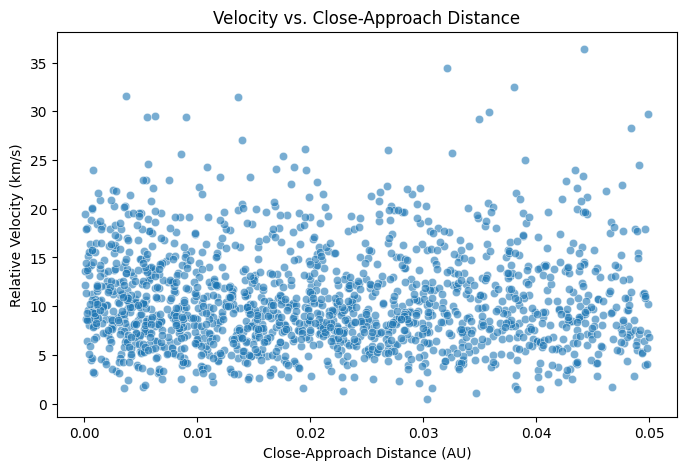

In [103]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["CA DistanceNominal (au)"], y=df["V relative(km/s)"], alpha=0.6)
plt.xlabel("Close-Approach Distance (AU)")
plt.ylabel("Relative Velocity (km/s)")
plt.title("Velocity vs. Close-Approach Distance")
plt.show()


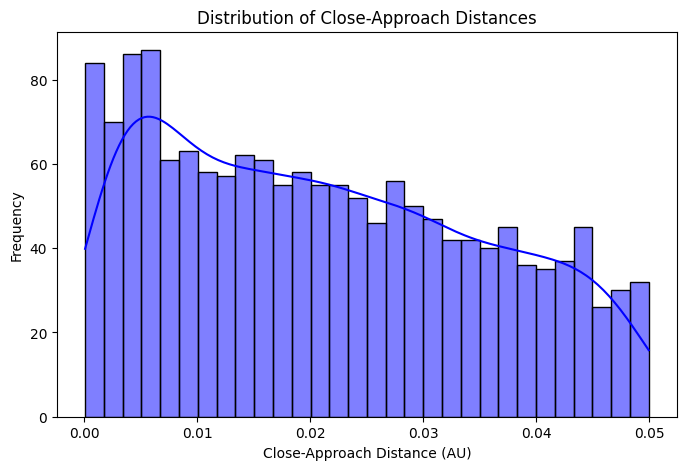

In [81]:

# Visualization - Histogram of Close-Approach Distance (AU)
plt.figure(figsize=(8, 5))
sns.histplot(df["CA DistanceNominal (au)"], bins=30, kde=True, color='blue')
plt.xlabel("Close-Approach Distance (AU)")
plt.ylabel("Frequency")
plt.title("Distribution of Close-Approach Distances")
plt.show()




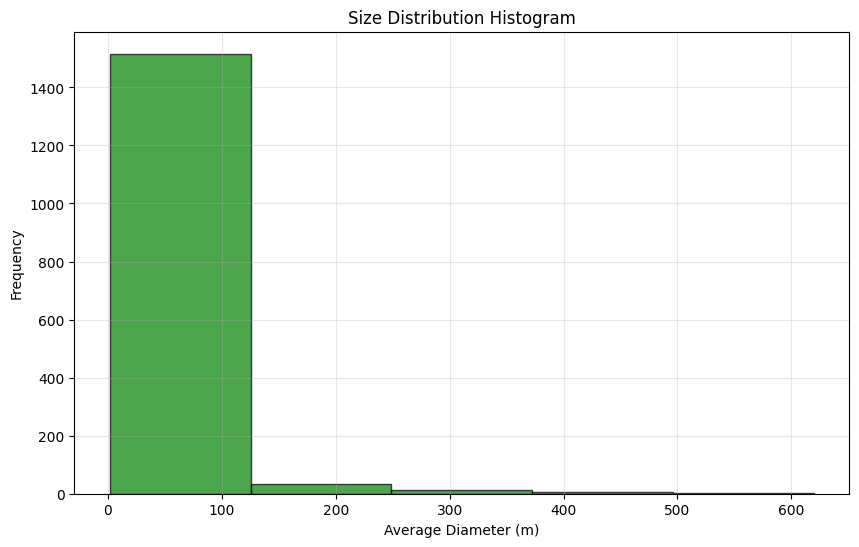

In [96]:
plt.figure(figsize=(10, 6))
plt.hist(
    (df["Diameter Min (m)"] + df["Diameter Max (m)"]) / 2,
    bins=5,
    color='green',
    edgecolor='black',
    alpha=0.7
)
plt.xlabel("Average Diameter (m)")
plt.ylabel("Frequency")
plt.title("Size Distribution Histogram")
plt.grid(True, alpha=0.3)
plt.show()


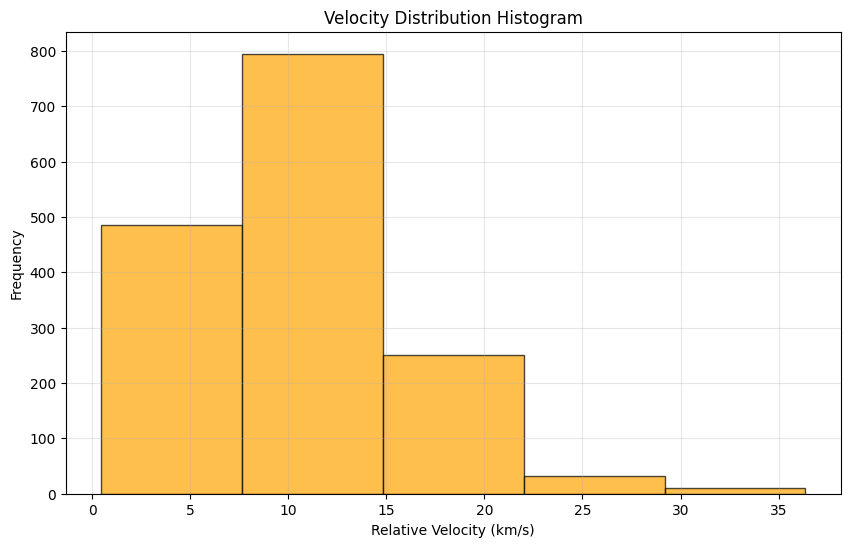

In [98]:
plt.figure(figsize=(10, 6))
plt.hist(
    df["V relative(km/s)"],
    bins=5,
    color='orange',
    edgecolor='black',
    alpha=0.7
)
plt.xlabel("Relative Velocity (km/s)")
plt.ylabel("Frequency")
plt.title("Velocity Distribution Histogram")
plt.grid(True, alpha=0.3)
plt.show()

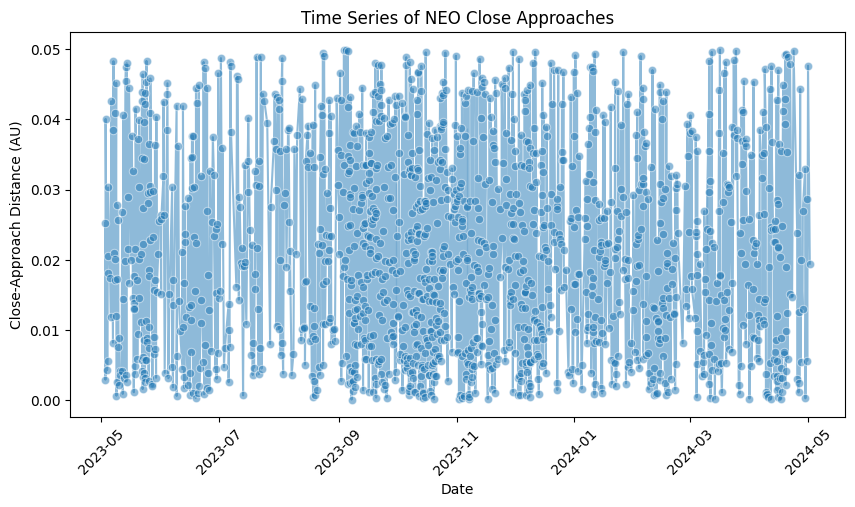

In [102]:
#  Time series analysis of close approaches
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Close-Approach (CA) Date")
sns.lineplot(x=df_sorted["Close-Approach (CA) Date"], y=df_sorted["CA DistanceNominal (au)"], marker="o", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Close-Approach Distance (AU)")
plt.title("Time Series of NEO Close Approaches")
plt.xticks(rotation=45)
plt.show()

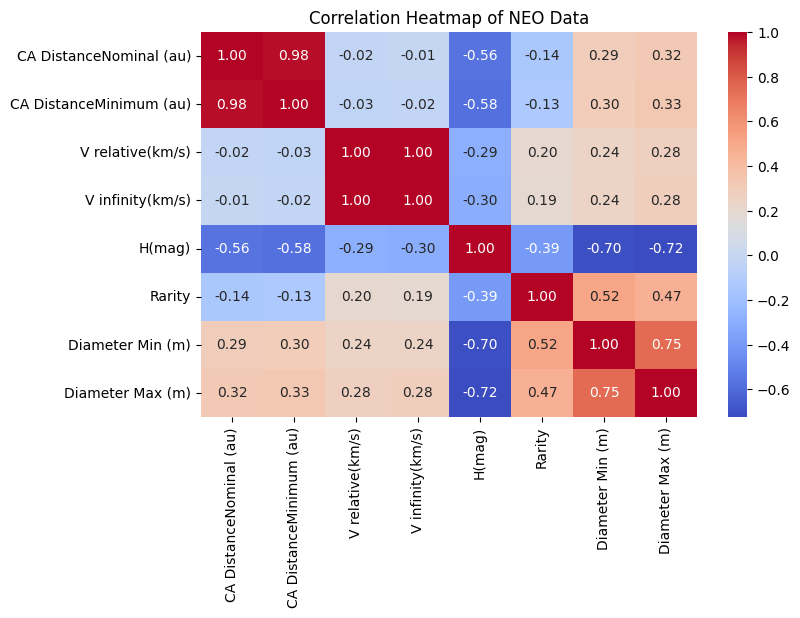

In [104]:
# Correlation heatmap

numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of NEO Data")
plt.show()